<a href="https://colab.research.google.com/github/aryanpawar09/Neural_Network_for_Image_Classification-/blob/main/BuildingANeuralNetworkForImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST - Description
Objective

Fashion-MNIST is a dataset of Zalando's article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

The objective of the project is - to use Fashion-MNIST data set to identify (predict) different fashion products(articles) from the given images using Machine Learning.

In [1]:
# Import the Libraries
import numpy as np

In [3]:
import tensorflow as tf
print("Tensorflow version->",tf.__version__)

Tensorflow version-> 2.18.0


In [4]:
from tensorflow import keras
print("Keras version->",keras)

Keras version-> <KerasLazyLoader>


In [5]:
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

# Loading the Dataset
Let's load the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set.

In [7]:
fashion_mnist=keras.datasets.fashion_mnist

In [8]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

# Splitting the Data
Though the dataset is already split for you between a training set and a test set, it can be useful to split the training set further to have a validation set. We shall do that here.

Let's split the full training set into a validation set and a (smaller) training set. We will also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [11]:
X_valid = X_train_full[:5000]/255.

In [12]:
y_valid = y_train_full[:5000]

In [13]:
X_train = X_train_full[5000:]/255.

In [14]:
y_train = y_train_full[5000:]

In [17]:
print("Train data shape",X_train.shape)
print("Validation data shape",X_valid.shape)
print("Test data shape",X_test.shape)

Train data shape (55000, 28, 28)
Validation data shape (5000, 28, 28)
Test data shape (10000, 28, 28)


In [18]:
# Scale the test data where values would be within 0 to 1
X_test = X_test/255.

# Visualising the Data

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is  4
Class name is  Coat


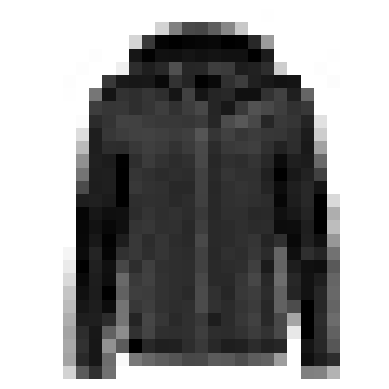

In [22]:
print("Class label is ", y_train[0])
print("Class name is ", class_names[y_train[0]])
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()


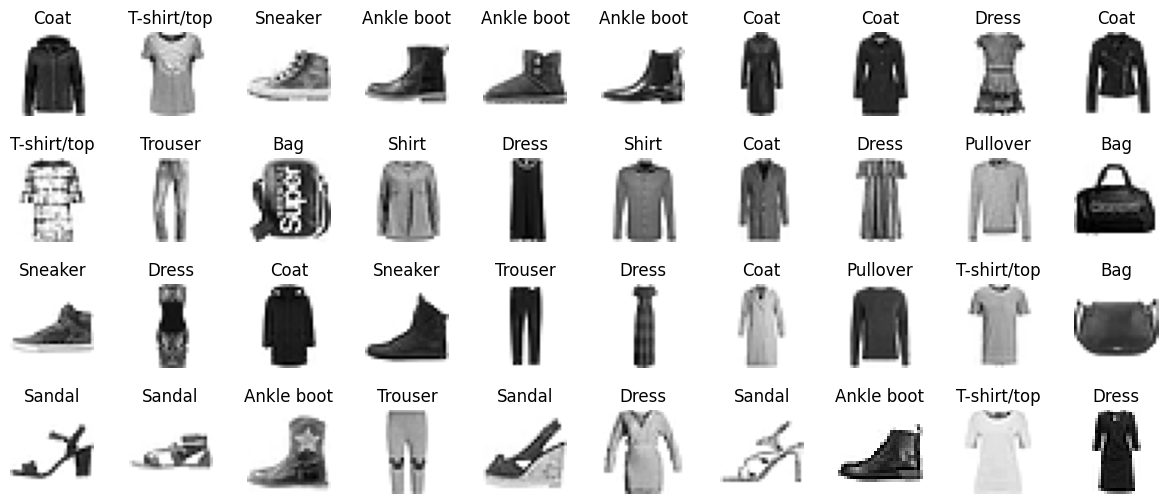

In [23]:
n_rows=4
n_cols=10
plt.figure(figsize=(15,6))
for row in range(n_rows):
  for col in range(n_cols):
    index=n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(X_train[index],cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2 , hspace=0.5)
plt.show()

# Building the Model
Let us build a neural network with Dense layers for this classification problem.

In [24]:
keras.backend.clear_session()

In [26]:
model = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28]),  # Explicit Input layer
    keras.layers.Flatten(),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [27]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

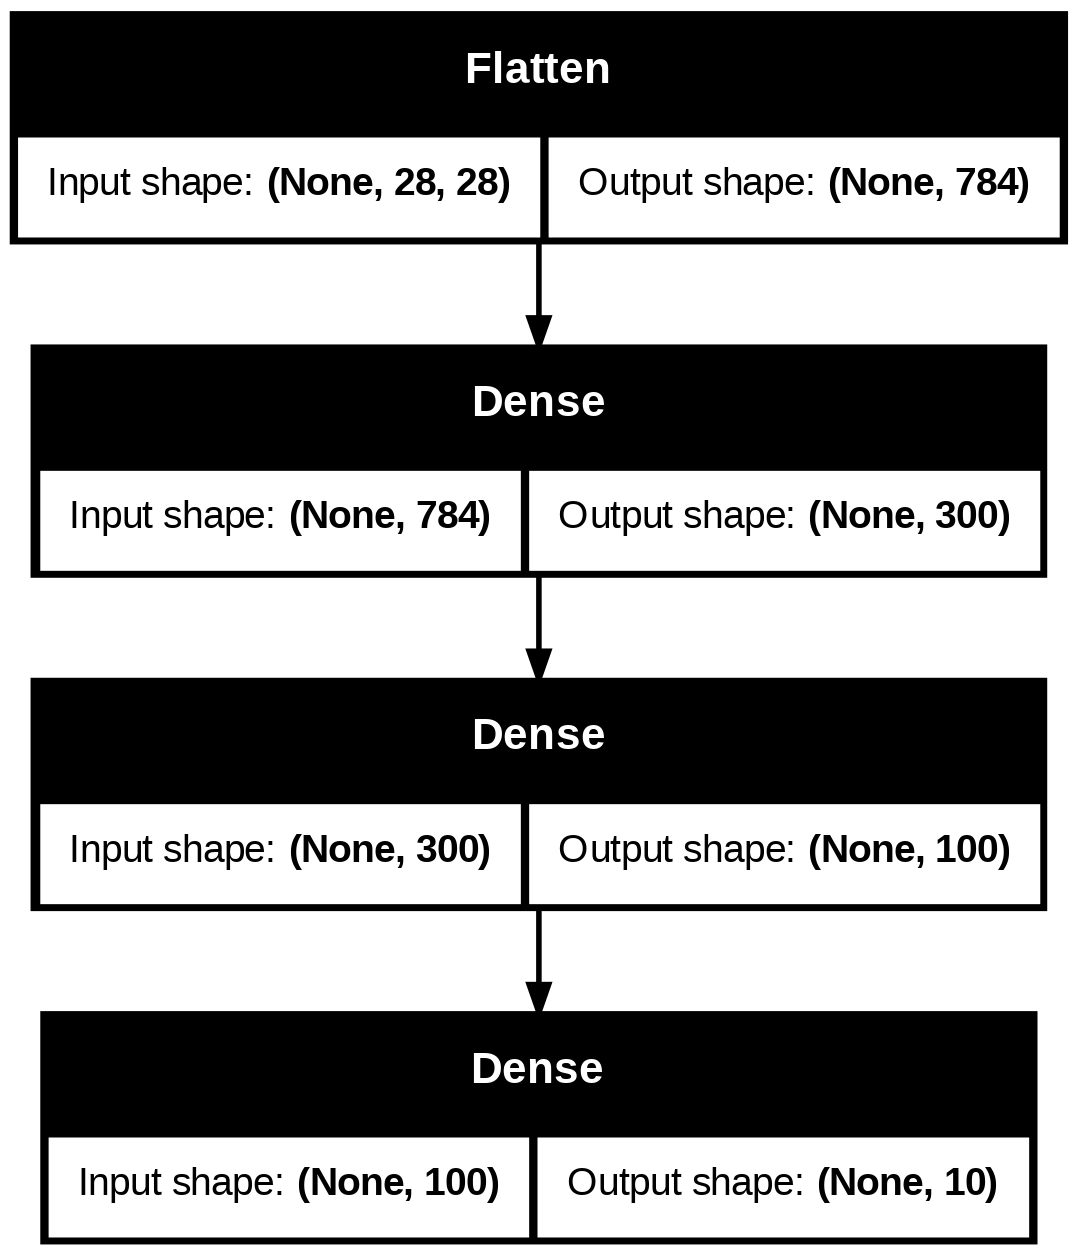

In [30]:
keras.utils.plot_model(model,"my_fashion_mnist_model.png" , show_shapes=True)

In [31]:
sgd=keras.optimizers.SGD(learning_rate=0.01)

In [32]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd , metrics=['accuracy'])

# Fitting the Model
Let us train the model on the train data.

In [33]:
history=model.fit(X_train , y_train , epochs=30 , validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6855 - loss: 0.9906 - val_accuracy: 0.8204 - val_loss: 0.5293
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8253 - loss: 0.5022 - val_accuracy: 0.8456 - val_loss: 0.4597
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8413 - loss: 0.4464 - val_accuracy: 0.8536 - val_loss: 0.4245
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8514 - loss: 0.4161 - val_accuracy: 0.8618 - val_loss: 0.4014
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8596 - loss: 0.3946 - val_accuracy: 0.8664 - val_loss: 0.3860
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8650 - loss: 0.3781 - val_accuracy: 0.8710 - val_loss: 0.3739
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8690 - loss: 0.3645 - val_accuracy: 0.8740 - val_loss: 0.3632
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8735 - loss: 0.3526

In [34]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [35]:
hidden1 = model.layers[1]
print(hidden1.name)

dense_3


In [36]:
weights,biases=hidden1.get_weights()
print(weights.shape,weights)
print(biases)

(784, 300) [[-0.0157562  -0.02748568 -0.00903571 ...  0.06493889 -0.01483405
   0.02008645]
 [-0.06220121  0.02055154  0.01811264 ... -0.07128888  0.04947999
  -0.01124354]
 [ 0.00439627 -0.03857113  0.01879031 ... -0.0409992   0.05465103
  -0.00147928]
 ...
 [ 0.04512462 -0.03328341 -0.01103153 ... -0.00985501 -0.04732423
   0.02552135]
 [-0.01969171 -0.02714722  0.04202763 ...  0.03775927 -0.01241097
   0.03994745]
 [-0.04811704  0.00511029  0.00696046 ...  0.00502893  0.03611087
   0.02377287]]
[ 0.01915471  0.05819346  0.05346859  0.01378858  0.08348159  0.07794638
  0.00847867  0.01152837 -0.03387257  0.17153718  0.05100413  0.12685631
  0.01815197  0.10234036  0.0598109   0.04038979  0.10875297  0.10807589
  0.0799308  -0.06531056  0.0197872  -0.00313856  0.05418076  0.00618776
  0.00121836  0.03995274 -0.01074923  0.06619056 -0.03429608  0.05418758
  0.03160645  0.04631231 -0.01602734  0.03704135  0.04675278  0.07391764
 -0.0897119   0.059393   -0.00623095 -0.03134528  0.0891608

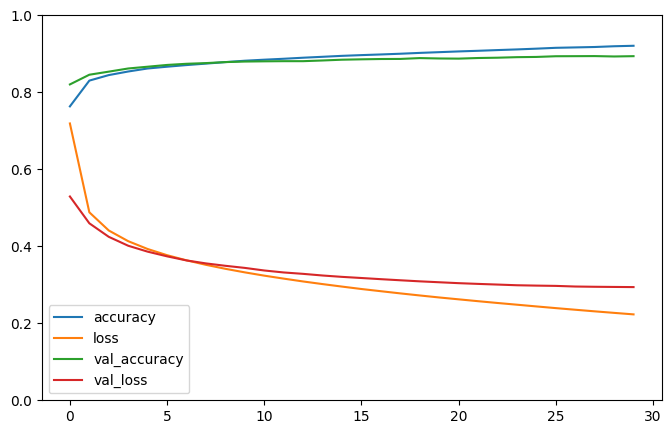

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

# Evaluating the Model Performance
Let us see how well our model has learnt from the train data, by testing it on the test data.



In [40]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8761 - loss: 0.3409


[0.33812543749809265, 0.8762000203132629]

In [41]:
y_pred = np.argmax(model.predict(X_test[:3]),1)
print(y_pred)
print([class_names[index] for index in y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


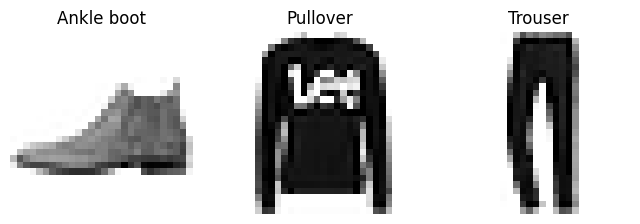

In [48]:
plt.figure(figsize=(8,3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()